## Objectives 
- Exploring different econ data & their correlations using Fred API:
    1. How unemployment rate affect the return of SP500 (Guided by https://www.youtube.com/watch?v=R67XuYc9NQ4)
    2. How bonds affect the return of SP500
    3. How the 
- Attempt to demonstrate fabulous visualizing in seaborn 
- Providing extra key insights & outlooks


### Importing Libs

In [69]:
import pandas as pd
import numpy as np 

# Data
from fredapi import Fred 
fred = Fred(api_key='90e9e49b1e97108193493ea0ee418912')

# Visualizations
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_theme(style="darkgrid")


### Searching & Selecting The Benchmark 

In [70]:
pop_df = fred.search('S&P', order_by='popularity')
pop_df.info() # default is 1000 rows by 15 columns

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, BAMLH0A0HYM2 to GCT1502DC
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         1000 non-null   object        
 1   realtime_start             1000 non-null   datetime64[ns]
 2   realtime_end               1000 non-null   datetime64[ns]
 3   title                      1000 non-null   object        
 4   observation_start          1000 non-null   datetime64[ns]
 5   observation_end            1000 non-null   datetime64[ns]
 6   frequency                  1000 non-null   object        
 7   frequency_short            1000 non-null   object        
 8   units                      1000 non-null   object        
 9   units_short                1000 non-null   object        
 10  seasonal_adjustment        1000 non-null   object        
 11  seasonal_adjustment_short  1000 non-null   object        


In [71]:
pop_df.head() # show first 5 rows

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-08-02,2022-08-02,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-08-01,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-08-02 08:59:04-05:00,95,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2022-08-02,2022-08-02,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-07-26 08:02:02-05:00,89,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2022-08-02,2022-08-02,ICE BofA US High Yield Index Effective Yield,1996-12-31,2022-08-01,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-08-02 08:59:08-05:00,84,This data represents the effective yield of th...
SP500,SP500,2022-08-02,2022-08-02,S&P 500,2012-08-02,2022-08-01,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-08-01 19:10:52-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2022-08-02,2022-08-02,Real Median Household Income in the United States,1984-01-01,2020-01-01,Annual,A,2020 CPI-U-RS Adjusted Dollars,2020 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2021-09-15 08:45:01-05:00,81,Household data are collected as of March. As ...


In [72]:
# Select the S&P 500
sp500 = fred.get_series(series_id='SP500') 

Text(0.5, 1.0, 'S&P 500')

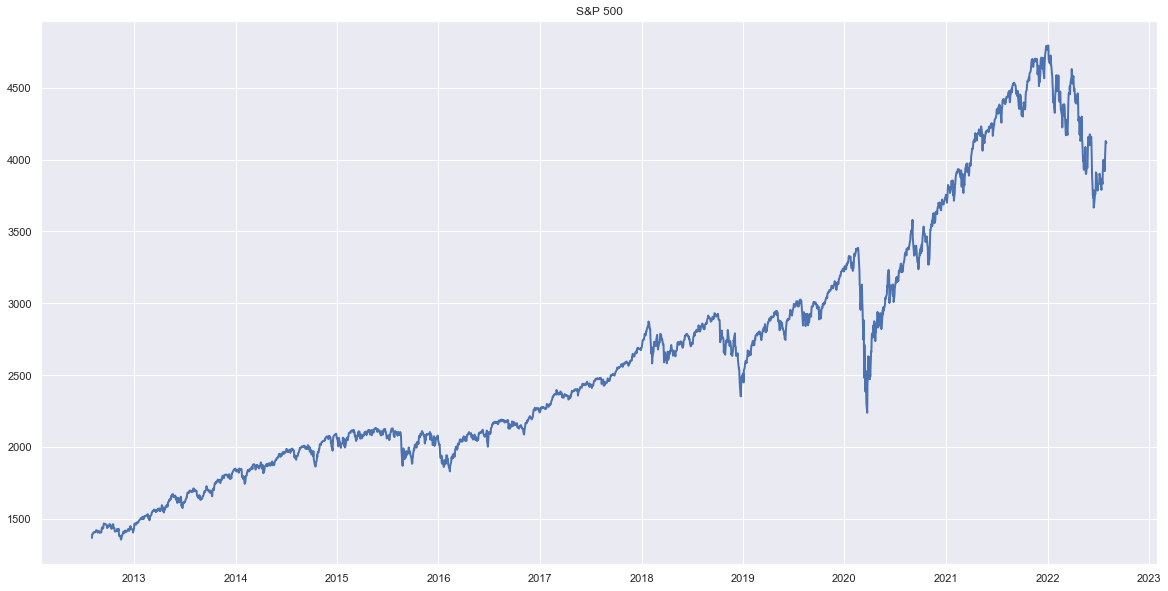

In [73]:
# Plotting the SP500 in line chart
sns.set(rc={'figure.figsize':(20,10), 'lines.linewidth': 2}) # might be better if put it after importing seaborn
sns.lineplot(data=sp500).set_title('S&P 500')

### Joining Data
- **Notice the inconsistencies:**
    - The column of "seasonal_adjustment" contains *Not Seasonally Adjusted* & *Seasonally Adjusted* (for short term analysis, seasonal adjustment data will be best.)
    - The "frequency_short" column contains *Week|Month|Quarterly|Annual* (unemployment rate comes out every month so monthly)
    - The "units" column contains *percentage|number* (% to better gauge at the changes)

In [177]:
# search any thing that is relate to unemployment to explore the available data provided by FRED 
unemp_df = fred.search('unemployment rate state')
# query the necessary data to get the only monthly data, seasonal adjustment, and units as percent
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent" and frequency == "Monthly"') # Notice the rows shrunk down in size & the selected data needs to be exact 
# select title conlumn but only relevent the Unemployment Rate (str) then locate where that is true
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')] 
# get rid of repetitive columns such as the seasonality adjustment shorts so anything that has _shorts at the end (optional)
unemp_df = unemp_df.drop(['seasonal_adjustment_short','frequency_short','units_short'], axis=1)
# get rid of the rows that contains the following words "DISCONTINUED", "Region","Division","District" in the title column
unemp_df = unemp_df.drop(unemp_df[unemp_df['title'].str.contains('|'.join(['DISCONTINUED','Region','Division','District']))].index) 
# get rid of the rows that contains numeric values in the id column
unemp_df = unemp_df.drop(unemp_df[unemp_df['id'].str.contains('\d')].index)

unemp_df # So cleaaaaaaaan OMG!

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,units,seasonal_adjustment,last_updated,popularity,notes
series id,,,,,,,,,,,,
CAUR,CAUR,2022-08-03,2022-08-03,Unemployment Rate in California,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:01-05:00,54,None
TXUR,TXUR,2022-08-03,2022-08-03,Unemployment Rate in Texas,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:03-05:00,48,None
FLUR,FLUR,2022-08-03,2022-08-03,Unemployment Rate in Florida,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:02-05:00,48,None
NYUR,NYUR,2022-08-03,2022-08-03,Unemployment Rate in New York,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:05-05:00,44,None
OHUR,OHUR,2022-08-03,2022-08-03,Unemployment Rate in Ohio,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:05-05:00,40,None
MIUR,MIUR,2022-08-03,2022-08-03,Unemployment Rate in Michigan,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:06-05:00,36,None
PAUR,PAUR,2022-08-03,2022-08-03,Unemployment Rate in Pennsylvania,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:06-05:00,37,None
TNUR,TNUR,2022-08-03,2022-08-03,Unemployment Rate in Tennessee,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:06-05:00,34,None
NJUR,NJUR,2022-08-03,2022-08-03,Unemployment Rate in New Jersey,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:16-05:00,18,None


In [178]:
unemp_df.shape

(51, 12)

In [176]:
# Go through each of the series & pull only the UNRATE data using the id 
for mydata in unemp_df.index:
    r = fred.get_series(mydata)
    break
r

1976-01-01    9.2
1976-02-01    9.2
1976-03-01    9.1
1976-04-01    9.1
1976-05-01    9.0
             ... 
2022-02-01    5.3
2022-03-01    4.8
2022-04-01    4.6
2022-05-01    4.3
2022-06-01    4.2
Length: 558, dtype: float64

In [128]:
r.to_frame(name=mydata) # convert it to a dataframe & name it as my chosen datasets
r 

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2022-02-01    3.8
2022-03-01    3.6
2022-04-01    3.6
2022-05-01    3.6
2022-06-01    3.6
Length: 894, dtype: float64